# PHYS 309 Assignment 1
## Michael Ward
### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [3]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

Text(0.5, 1.0, 'Electric Field')

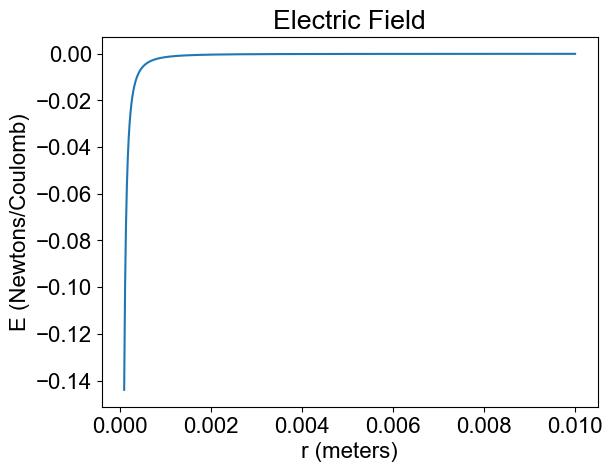

In [42]:
# Plot here
#defines distance r', the distance from the origin to q in frame S'
r_prime = np.linspace(.0001,.01, num=1000, endpoint=True)
#defines Electric Field as a function of q and r
def E_Field(q, r):
    return (1/(4*np.pi*constants.epsilon_0))*(q/r**2)
#plots Electric field, using value of q and r_prime as variables
plt.plot(r_prime, E_Field(-constants.e, r_prime))
plt.xlabel('r (meters)')
plt.ylabel('E (Newtons/Coulomb)')
plt.title("Electric Field")

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0.5, 1.0, 'C Prime')

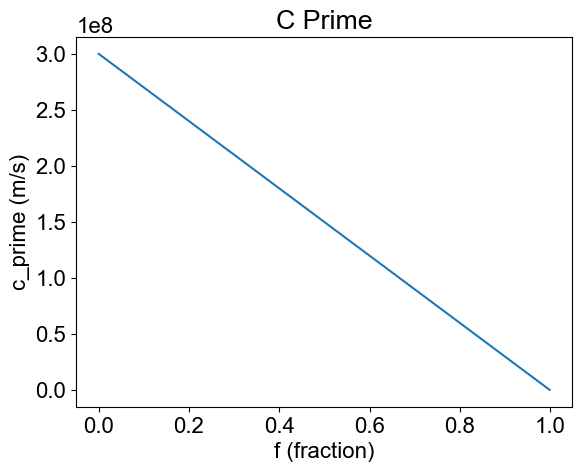

In [43]:
# Plot here
#define speed of light
c = 1/np.sqrt(constants.epsilon_0*constants.mu_0)
f = np.linspace(0,1, num=1000, endpoint=False)
def c_prime (f):
    return c*(1-f)
#Plot code
plt.plot(f,c_prime(f))
plt.xlabel('f (fraction)')
plt.ylabel('c_prime (m/s)')
plt.title('C Prime')

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0, 0.5, 'E_prime (N/C)')

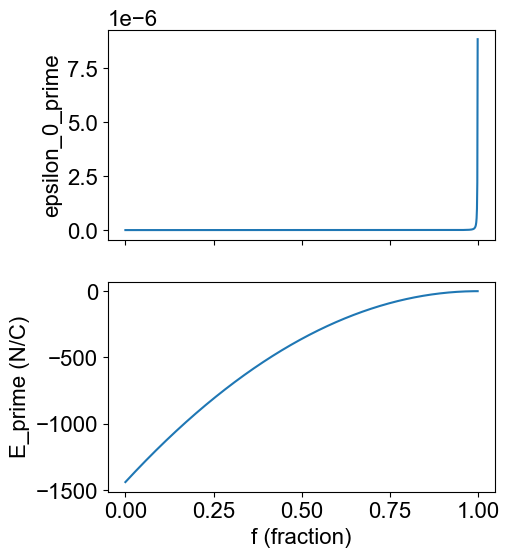

In [44]:
# Plot here
#Find epsilon_0_prime by rearranging speed of light equation (1)
epsilon_0_prime = 1/(c_prime(f)**2*constants.mu_0)
#define micrometer
um = 10**-6
#define Electric Field Prime, epsilon_0_prime replaces epsilon_0 and micrometer replaces r
E_prime = (1/(4*np.pi*epsilon_0_prime))*(-constants.e/um**2)

#Subplot Code
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize = (5,6))

ax1.plot(f,epsilon_0_prime)
ax1.set_ylabel('epsilon_0_prime')

ax2.plot(f, E_prime)
ax2.set_xlabel ('f (fraction)')
ax2.set_ylabel ('E_prime (N/C)')

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

The problem I noticed is that the two plots do not align. They produced a similar curve, but they should overlap. This means that epsilon_0 is not the same is both frames of reference, which cannot be true.


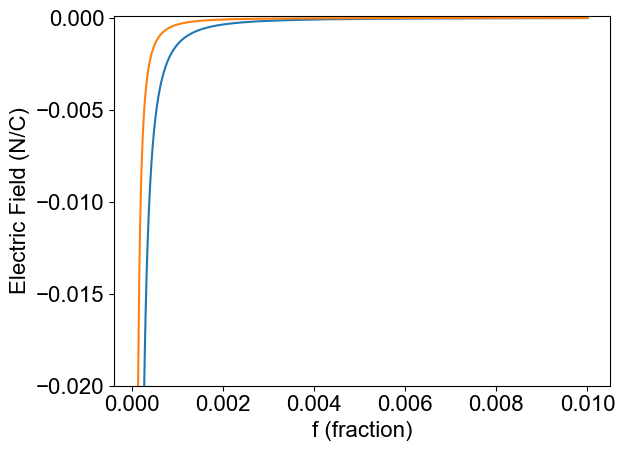

In [45]:
# Plot here
#Electric Field from Problem 1; redefined as function of r, not as function of q and r
def E_Field(r):
    return (1/(4*np.pi*constants.epsilon_0))*(-constants.e/r**2)
r_prime = np.linspace(.0001,.01, num=1000, endpoint=True)
#Electric Field Prime from Problem 3; redefined f as .5
epsilon_0_prime = 1/(c_prime(.5)**2*constants.mu_0)
def E_prime(r):
    return (1/(4*np.pi*epsilon_0_prime))*(-constants.e/r**2)

#Plot code
plt.plot(r_prime, E_Field(r_prime))

plt.plot(r_prime, E_prime(r_prime))
plt.xlabel ('f (fraction)')
plt.ylabel ('Electric Field (N/C)')
plt.ylim([-.02,.0001])

print("The problem I noticed is that the two plots do not align. They produced a similar curve, but they should overlap. This means that epsilon_0 is not the same is both frames of reference, which cannot be true.")

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

Text(0.5, 1.0, 'mu_0_prime')

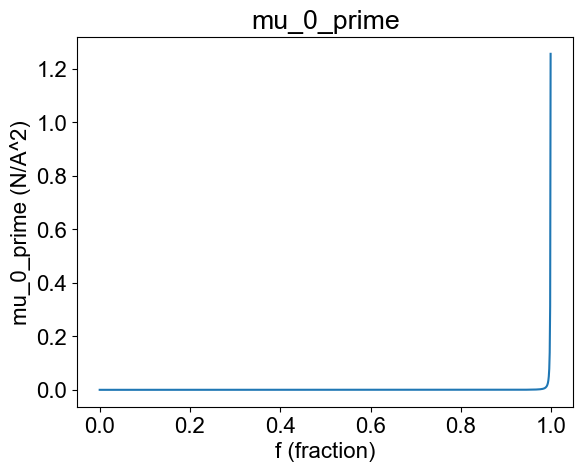

In [46]:
# Plot here
#Find mu_0_prime by rearranging speed of light equation (1)
mu_0_prime = 1/(constants.epsilon_0*c_prime(f)**2)
f = np.linspace(0,1, num=1000, endpoint=False)
plt.plot(f,mu_0_prime)
plt.xlabel('f (fraction)')
plt.ylabel('mu_0_prime (N/A^2)')
plt.title('mu_0_prime')

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

(0.0, 5e-05)

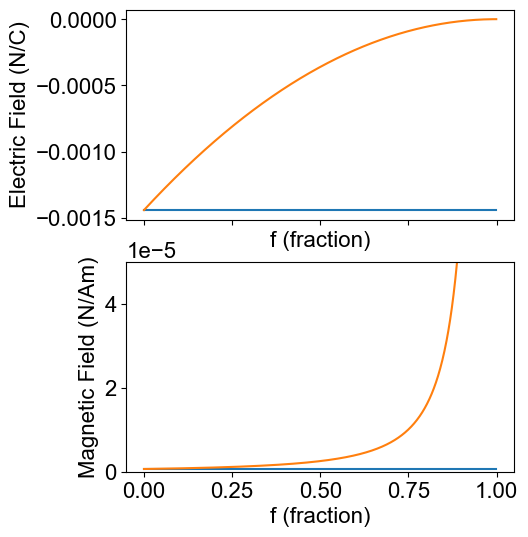

In [47]:
# Plot here
def c_prime(f):
    return c*(1-f)
epsilon_0_prime = 1/(c_prime(f)**2*constants.mu_0)
mu_0_prime = 1/(constants.epsilon_0*c_prime(f)**2)
E_Field = -constants.e/(4*np.pi*constants.epsilon_0*10**-6)
E_Prime = -constants.e/(4*np.pi*epsilon_0_prime*10**-6)
B_Field = constants.mu_0/2
B_Prime = mu_0_prime/2

fig, (ax5, ax6) = plt.subplots(2,1,sharex=True, figsize = (5,6))

ax5.plot(f, E_Field*np.ones(len(f)))
ax5.plot(f, E_Prime*np.ones(len(f)))
ax5.set_xlabel ('f (fraction)')
ax5.set_ylabel ('Electric Field (N/C)')
         
ax6.plot(f, B_Field*np.ones(len(f)))
ax6.plot(f, B_Prime*np.ones(len(f)))
ax6.set_xlabel ('f (fraction)')
ax6.set_ylabel ('Magnetic Field (N/Am)')
ax6.set_ylim([0,.00005]) #Zoom in to origin

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.